def generate_signature(cmt1, ch2, h): #vettore di sigma_i MANCANTE
    rsp0_p = vector(GF(p), t-w)
    rsp0_z = vector(GF(z), t-w)
    rsp0 = [rsp0_p, rsp0_z]
    rsp1 = [] #voglio che sia un vettore di t-w elementi, ed ogni singolo elemento è una stringa binaria di lunghezza lambda
    for x in range(0,t-w):
        rsp1[x] = create_random_vector(GF(2), lamb, 0) #gli passiamo un seed vuoto
        rsp1.append(rsp1[x])
        x = x+1
    j = 0
    for i in range(0, t-1):
        if ch2[i] == 0: 
            #cmt0[i] recomputation by the verifier with cmt1[i] to send
            rsp0[j] = [rsp0_p.append(h[i]), rsp0_z.append(sigma[i])] #non ho capito se bisogna aggiungere in coda agli elementi gia presenti in rsp0 gli elementi yi e sigma i oppure se si devono sovrascrivere
            rsp1[j] = cmt1[i]
            j = j+1
    signature = bin(str(salt)) + bin(str(d01)) + bin(str(db)) + bin(str(proof)) + bin(str(seed_path)) + bin(str(rsp0)) + bin(str(rsp1)) #servono stringhe binarie per la sign
    return signature

def rebuild_seed_tree_leaves(seed_path, ch2, salt): #serve lo stesso salt del signature
    return seeds

def true_or_false(d1, dp1, d2, dp2):
    if d1 == dp1 and d2 == dp2:
        return True
    else:
        return False
    
def signature_verification(seed_pk, s, msg, signature, h, rsp0, eta): #da signature si ricavano salt d01 db merkle proof seedpath rsp0 e rsp1
    #key material expansion
    V = create_random_matrix(Fp, k, r, seed_pk)
    #Challenge recomputation
    ch1 = generate_first_challenge(c0, c1, msg, salt)
    ch2 = generate_second_challenge(c0, c1, msg, salt, ch1, h)
    seeds = rebuild_seed_tree_leaves(seed_path, b, salt)
    j = 0
    v = vector(Fp,n) #v∈ Fp^n
    for i in range(0, t-1):
        if ch2[i] == 0:
            c1[i] = hash(str(seeds[i]) + str(salt) + str(i))
            seed_ui, seed_ei = expand_seed(seeds[i])
            eta_i = create_random_vector(Fz, n, seed_ei)
            sigma_i = eta-eta_i
            for j in range(0, n-1)
                ei = create_vEn(g, n, Fz, Fp, seed_ei)
                ui = create_random_vector(Fp, n, seed_ui)
                yi = ui+(ch_i_1)*ei
        else:
            rsp0_p = vector(GF(p), t-w)
            rsp0_z = vector(GF(z), t-w)
            rsp0 = [rsp0_p, rsp0_z]
            for j in range(0, t-1):
                yi[j], sigma_i[j] = rsp0[j]
                #verificare che sigma_i appartenga a G?
            for j in range(0, n-1):
                g = get_generator(p, z, Fp)
                for j in range(0, n-1):
                    v[j] = (g**sigma_i[j]) 
                yp = componentwise_multiply(v, yi)
                ui = create_random_vector(Fp, n, seed_ui)
                u = componentwise_multiply(v, ui)
                st = (yp[0:r] + yp[r:n]*V) - ch1[j]*s
                c0[i] = hash(str(st) + str(sigma_i) + str(salt) + str(i)) #vanno inizializzati
                c1[i] = rsp1[j]
                j = j+1
    d0p = recompute_merkle_root(c0, merkle_proof, ch2)
    d1p = hash(str(c1[0]) +)
    d01p = hash(str(d0p) + str(d1p))
    dbp = hash(#con le y)
    
    boolean = true_or_false(d01, d01p, db, dbp)
    return boolean

num_test 1
leaves pos [0, 3, 4, 10, 11, 12, 15, 18, 19, 21, 22, 23]
proof ['01', '02', '05', '013', '014', '020', '13', '14', '18', '33']
Average path size = 10.0000000000000 instead of 60
Min path size = 10
Max path size = 10, theoretic = 16.9804499913461


/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/all_cmdline.py:33: DeprecationWarning: the output of uniq(X) being sorted is deprecated; use sorted(set(X)) instead if you want sorted output
See https://trac.sagemath.org/27014 for details.


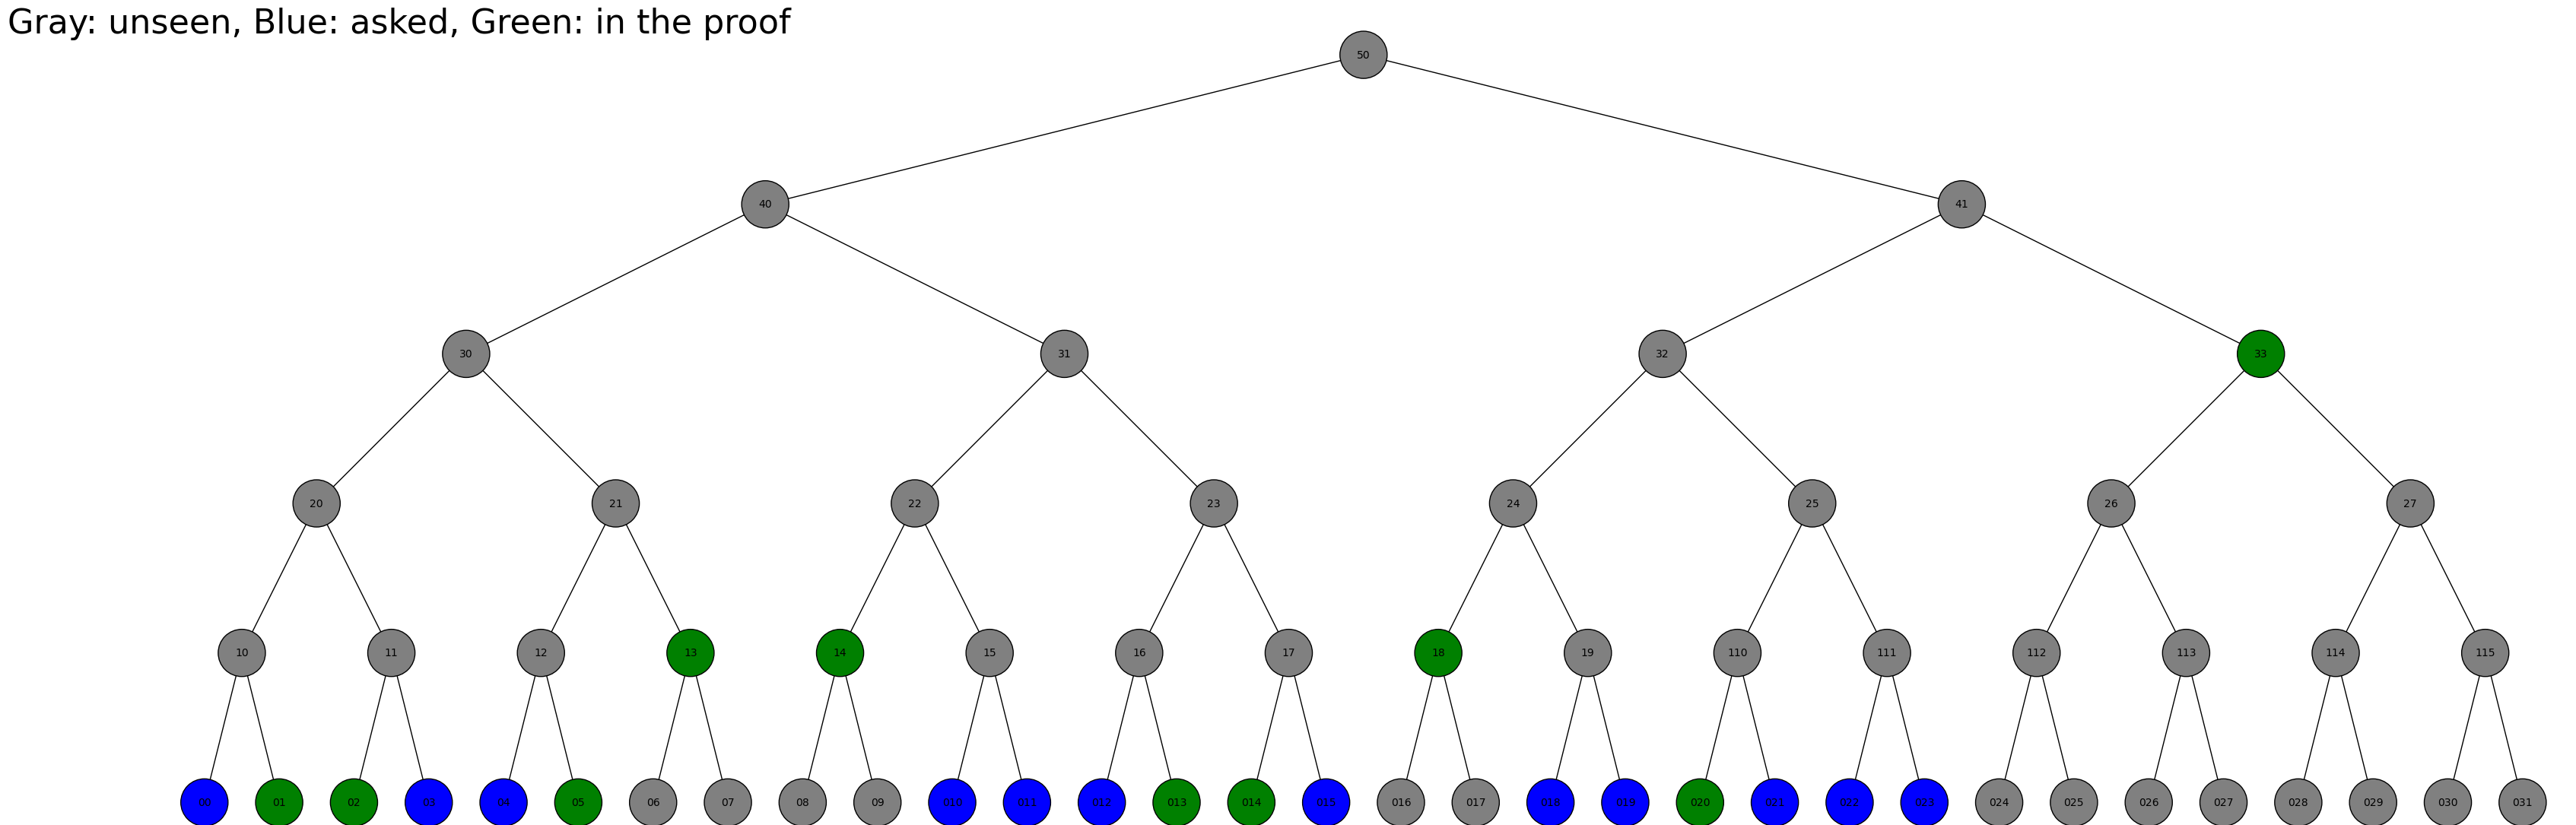

In [2]:
reset();

def log2(x):

    return log(x*1.)/log(2.);



#pos: leaf for which you want the merkle_proof (starting from 0)
#N: number of leaves in the base layer

def common_merkle_proof(pos,N):

    m_proof = [];
    Ns = 2^(ceil(log2(N)));
            #start from base layer
    this_pos = pos;
    for i in range(ceil(log2(N))):
        new_pos = [];
        for x in this_pos:
            val = x%2;
            if val== 0:
                needed_pos = x+1;
                if needed_pos not in this_pos:
                    m_proof.append(str(i)+str(needed_pos));
            else:
                needed_pos = x-1;
                if needed_pos not in this_pos:
                    m_proof.append(str(i)+str(needed_pos));
            new_pos.append(floor(x/2));


        this_pos = uniq(new_pos);

    return m_proof;

###########################
tree_size = 32; #choose as a power of 2
num_proof = 12;

num_test = 1;
min_val = tree_size;
max_val = 0;
ave_val = 0;

fig_size = 32;
N = tree_size;

worst_case = 1;

worst_pos = [];
worst_proof = [];

for i in range(num_test):
    print("num_test", num_test)
    leaves_pos = Combinations(tree_size, num_proof).random_element();
    print("leaves pos", leaves_pos)
    proofs = common_merkle_proof(leaves_pos,tree_size);
    print("proof", proofs)
    if len(proofs)>max_val:
        max_val = len(proofs);
        worst_pos = leaves_pos;
        worst_proof = proofs;
    if len(proofs)<min_val:
        min_val = len(proofs);
    ave_val += len(proofs);

print("Average path size = "+str(ave_val*1./num_test)+" instead of "+str(round(log2(tree_size))*num_proof));
print("Min path size = "+str(min_val));
print("Max path size = "+str(max_val)+", theoretic = "+str(num_proof*log2(tree_size/num_proof)));


#print worst case
if worst_case:
    leaves_pos = worst_pos;
    proofs = worst_proof;

#creating pos for graph
x_values = range(0,2*tree_size*tree_size,2*tree_size);
pos = {};
for ell in range(ceil(log2(tree_size))+1):
#     starting_pos = ell/2;
    dist_nodes = tree_size/(2^ell);
    pos.update(dict((str(ell)+str(i),[fig_size*x_values[i], 2*fig_size*2*tree_size*ell]) for i in range(round(tree_size/(2^ell)))));
    new_x_values = [];
    if len(x_values)>1:
        for j in range(round(tree_size/(2^(1+ell)))):
            new_val = (x_values[2*j]+x_values[2*j+1])/2;
            new_x_values.append(new_val);
    else:
        new_x_values = [0];

    x_values = new_x_values;

  #pos.update(dict((str(ell)+str(i),[-i*dist_nodes+tree_size/(2^ell), 2*tree_size*ell]) for i in range(round(tree_size/(2^ell)))));

#creating tree(nodes and edges)
tree = {};
colors = [];
for ell in range(ceil(log2(tree_size))):
    for i in range(round(tree_size/(2^ell))):
        upper_val = floor(i/2);
        tree.update({str(ell)+str(i): [str(ell+1)+str(upper_val)]});
        if ell == 0:
            if i in leaves_pos:
                colors.append('blue');
            else:
                if '0'+str(i) in proofs:
                    colors.append('green');
                else:
                    colors.append('gray');
        else:
            if str(ell)+str(i) in proofs:
                colors.append('green');
            else:
                colors.append('gray');

colors.append('gray');

g = Graph(tree);

#adding edges
#m_proof = proofs;
#for i in range(len(m_proof)-1):
#     g.add_edge((m_proof[i], m_proof[i+1], 'a'));

#a = g.graphplot(pos=pos, color_by_label=False, figsize = [fig_size,2*fig_size], vertex_size = 2000*32/N, vertex_colors=colors, title ='Gray: recomputed locally, Blue: asked, Green: in the proof', title_pos = [0.1, 2*fig_size*2*tree_size*ceil(log2(tree_size))+1 ], fontsize = 32).plot()
a = g.graphplot(pos=pos, color_by_label=False, figsize = [fig_size,2*fig_size], vertex_size = 2000*32/N, vertex_colors=colors, title ='Gray: unseen, Blue: asked, Green: in the proof', title_pos = [0.1, 2*fig_size*2*tree_size*ceil(log2(tree_size))+1 ], fontsize = 32).plot()
a.show();